In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('./diabetes.csv',on_bad_lines='skip', engine='python',encoding='utf-8')

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Xem tổng quát các cột: Gồm bao nhiêu cột, vào từng có có bao nhiêu giá trị

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Step 1: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


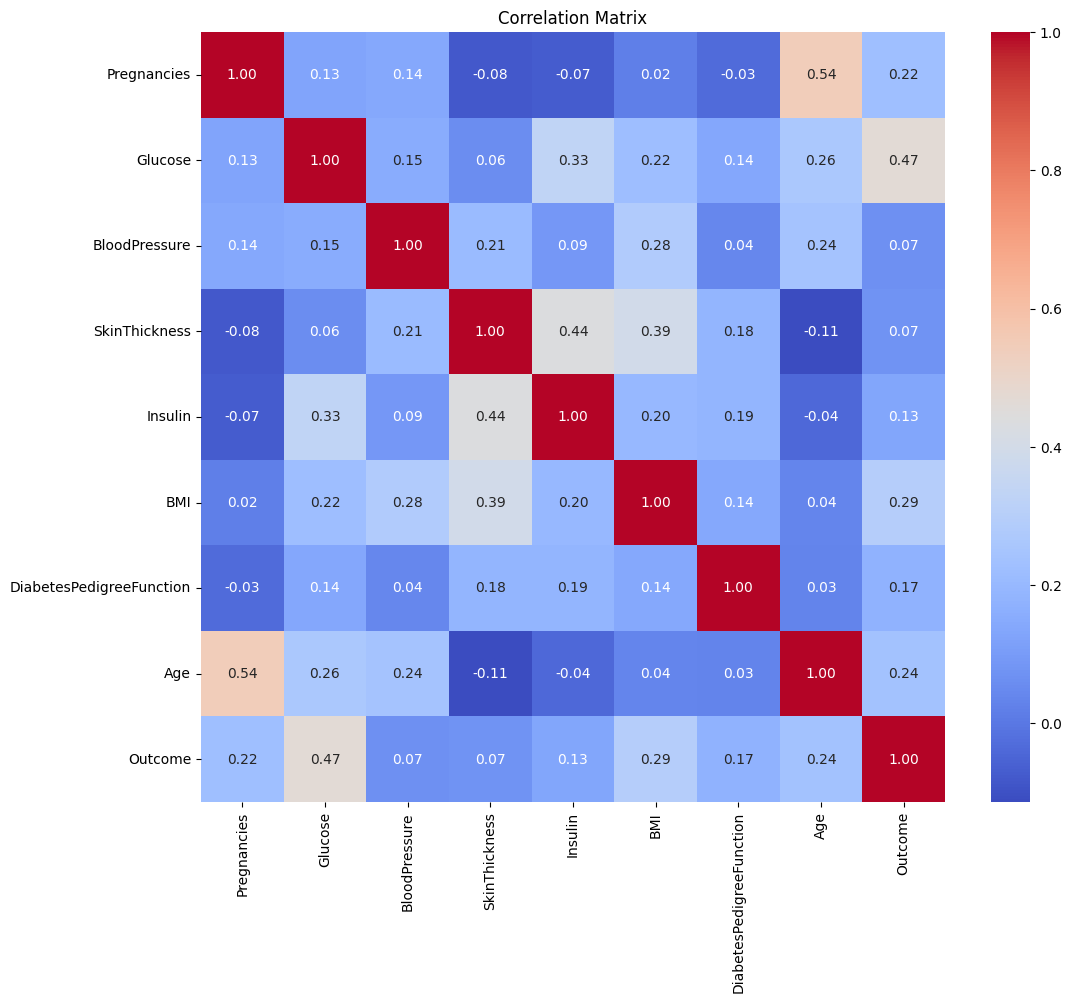

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = data.corr()

# Step 2: Draw the correlogram
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Step 3: Split the data into training and testing sets
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
y_test.head(10)

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
Name: Outcome, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 5: Train a logistic regression model
lr_model = LogisticRegression(random_state=1, max_iter=1000)
lr_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test.values)

accuracy_lr = accuracy_score(y_test, y_pred)
classification_rep_lr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_rep_lr)

# lr_model.predict([[6, 148, 72, 35, 0, 36.6, 0.627, 50]])
lr_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

Accuracy: 0.8246753246753247
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



array([0], dtype=int64)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test.values)
accuracy_dt = accuracy_score(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

# dt_model.predict([[6, 148, 72, 35, 0, 36.6, 0.627, 50]]) 
dt_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

Decision Tree Accuracy: 0.7662337662337663
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



array([0], dtype=int64)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test.values)
accuracy_rf = accuracy_score(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

rf_model.predict([[6, 148, 72, 35, 0, 36.6, 0.627, 50]])
# rf_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

Random Forest Accuracy: 0.7922077922077922
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



array([1], dtype=int64)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train a SVM model
svm_model = SVC()
svm_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test.values)
accuracy_svm = accuracy_score(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)

svm_model.predict([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
# svm_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

SVM Accuracy: 0.7922077922077922
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



array([1], dtype=int64)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test.values)
accuracy_knn = accuracy_score(y_test, y_pred)
classification_rep_knn = classification_report(y_test, y_pred)

print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_rep_knn)

# knn_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])
knn_model.predict([[8, 183, 64, 29, 0, 26.6, 0.351, 31]])
# knn_model.predict([[11, 143, 94, 33, 146, 36.6, 0.254, 51]])

KNN Accuracy: 0.7532467532467533
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



array([1], dtype=int64)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Gradient Boosting model
nb_model = GaussianNB()
nb_model.fit(X_train.values, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test.values)
accuracy_nb = accuracy_score(y_test, y_pred)
classification_rep_nb = classification_report(y_test, y_pred)

print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
print("Gaussian Naive Bayes Report:\n", classification_rep_nb)

nb_model.predict([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
# nb_model.predict([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

Gaussian Naive Bayes Accuracy: 0.7922077922077922
Gaussian Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



array([1], dtype=int64)

Logistic Regression Accuracy: 0.8246753246753247
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154




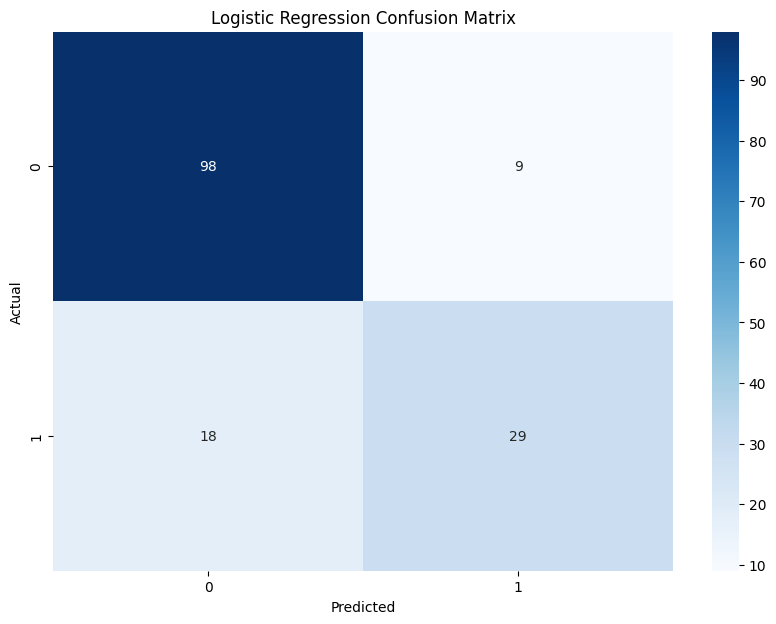

Decision Tree Accuracy: 0.7662337662337663
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154




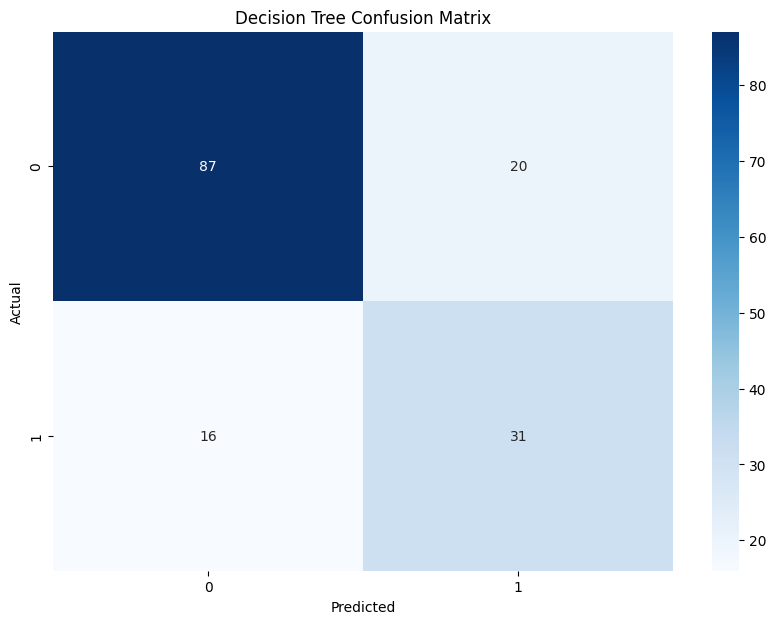

Random Forest Accuracy: 0.7922077922077922
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154




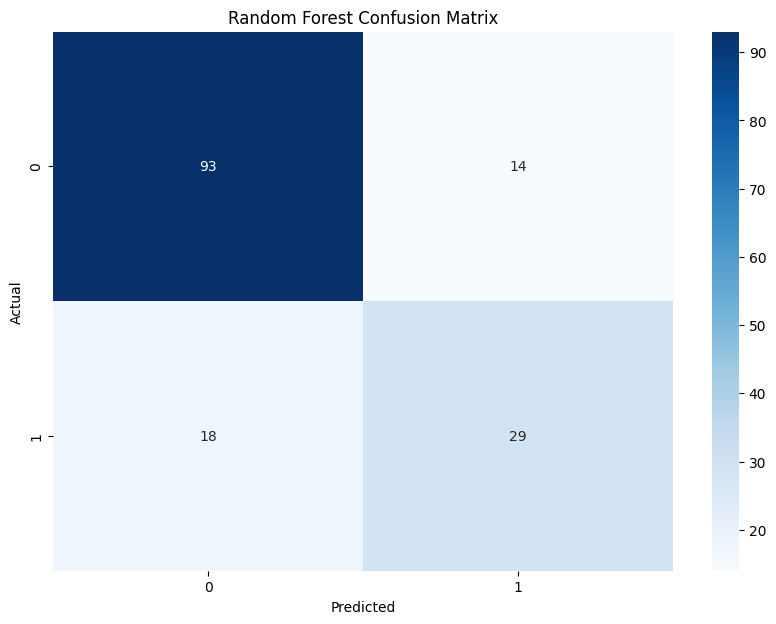

SVM Accuracy: 0.7922077922077922
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154




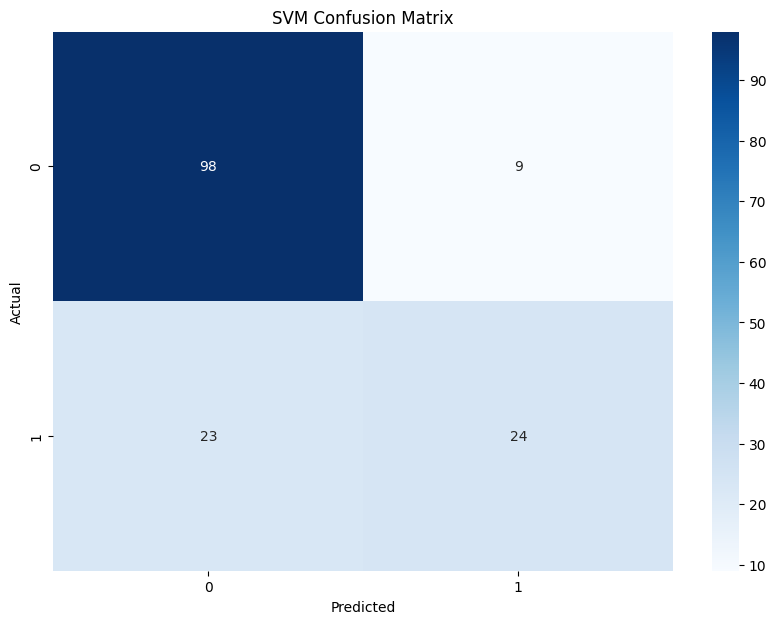

KNN Accuracy: 0.7532467532467533
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154




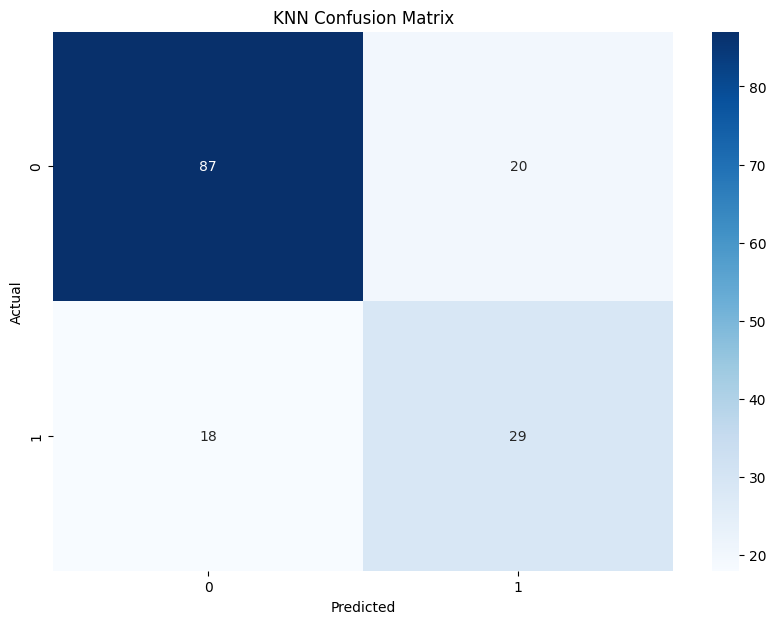

Gaussian Naive Bayes Accuracy: 0.7922077922077922
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154




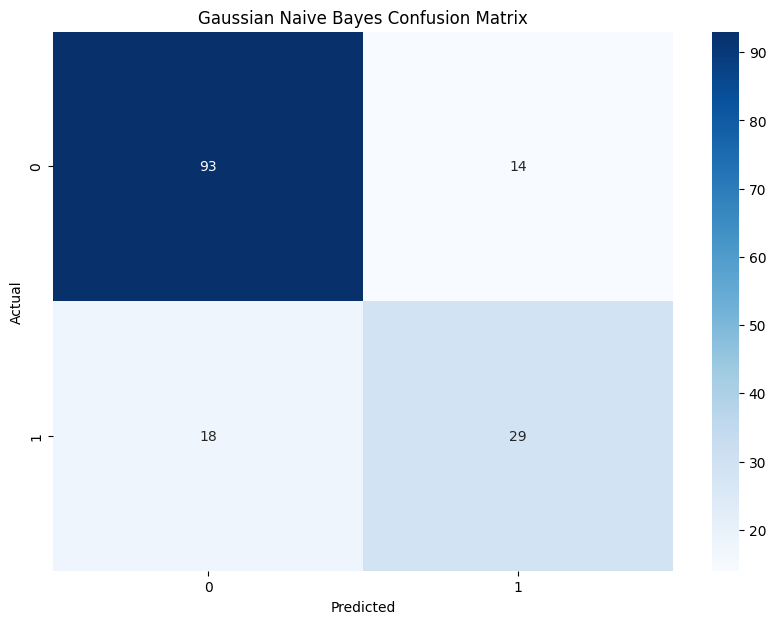

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train.values, y_train)
    y_pred = model.predict(X_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{classification_rep}\n")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [16]:
import joblib

joblib.dump(knn_model, 'diabetes_model.pkl')
joblib.dump(rf_model, 'diabetes_model.pkl')
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(dt_model, 'diabetes_model.pkl')
joblib.dump(svm_model, 'diabetes_model.pkl')
joblib.dump(nb_model, 'diabetes_model.pkl')

['diabetes_model.pkl']